In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from tqdm import tqdm
import pickle
import time 

In [2]:
training_data =[]
src_path="E:/PROJECTS/Plant-Leaf-Recognition-main/Plant-Leaf-Recognition-main/dataset"
subclass=os.listdir(src_path)
def create_training_data():
    for sclass in subclass:
        path=os.path.join(src_path,sclass)
        class_num=subclass.index(sclass)
        for img in tqdm(os.listdir(path)):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array, (224,224))
            training_data.append([new_array,class_num])
            
create_training_data()
print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 741/741 [02:00<00:00,  6.17it/s]

11562


In [3]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,224,224,1)
print(X[0])

[[[246]
  [247]
  [244]
  ...
  [242]
  [243]
  [241]]

 [[247]
  [246]
  [246]
  ...
  [243]
  [242]
  [242]]

 [[246]
  [245]
  [245]
  ...
  [242]
  [238]
  [242]]

 ...

 [[252]
  [253]
  [252]
  ...
  [247]
  [247]
  [247]]

 [[252]
  [253]
  [252]
  ...
  [247]
  [249]
  [247]]

 [[252]
  [253]
  [252]
  ...
  [248]
  [248]
  [246]]]


In [4]:

import pickle 
pickle_out = open("X_Augumented_Grayscale","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_Augumented_Grayscale","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
#Model 2
pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
NAME="Model_2"

model1=Sequential()

model1.add(Conv2D(100,(5,5),padding="same",strides=(2,2),activation="relu", input_shape=X.shape[1:]))
model1.add(MaxPooling2D(pool_size=(5,5),strides=(5,5)))
model1.add(Dropout(0.2))
model1.add(Conv2D(250,(5,5),padding="same",strides=(2,2),activation="relu"))
model1.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(15))
model1.add(Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
model1.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model1.fit(X,y,epochs=10,batch_size=1,validation_split=0.4,callbacks=[tensorboard])


Epoch 1/10
6937/6937 ━━━━━━━━━━━━━━━━━━━━ 175s 25ms/step - accuracy: 0.5153 - loss: 1.3204 - val_accuracy: 0.0102 - val_loss: 21.4697
Epoch 2/10
6937/6937 ━━━━━━━━━━━━━━━━━━━━ 172s 25ms/step - accuracy: 0.8764 - loss: 0.3451 - val_accuracy: 0.0201 - val_loss: 25.3981
Epoch 3/10
4800/6937 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 0.9037 - loss: 0.2728

KeyboardInterrupt: 

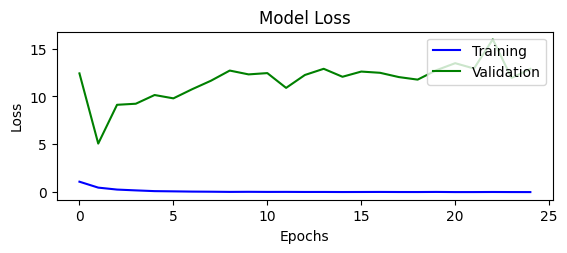

In [9]:
#Plot Model Loss
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'],loc='upper right')


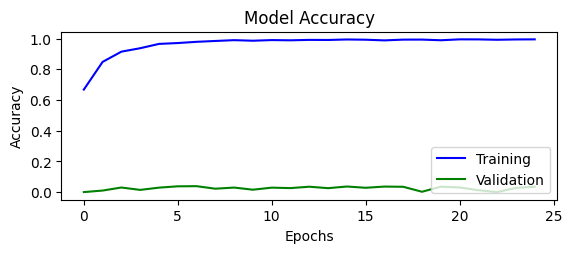

In [10]:
# Plot Accuracy
plt.subplot(211)
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'],loc='lower right')

In [12]:
model1.save("model2.keras")

In [8]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 112, 112, 100)       │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 250)         │         625,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 250)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 250)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15)                  │          60,015 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 15)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,063,597 (7.87 MB)

 Trainable params: 687,865 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,375,732 (5.25 MB)

In [9]:
#Model 3
pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
NAME="Model_3"

model=Sequential()

model.add(Conv2D(32,(3,3),padding="same",strides=(2,2),activation="relu", input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),padding="same",strides=(1,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),padding="same",strides=(1,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(15,activation='softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X,y,epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])
model.summary()

Epoch 1/10
9249/9249 ━━━━━━━━━━━━━━━━━━━━ 117s 12ms/step - accuracy: 0.5361 - loss: 1.4033 - val_accuracy: 0.0216 - val_loss: 14.8884
Epoch 2/10
9249/9249 ━━━━━━━━━━━━━━━━━━━━ 105s 11ms/step - accuracy: 0.8311 - loss: 0.4897 - val_accuracy: 0.0324 - val_loss: 16.2871
Epoch 3/10
9249/9249 ━━━━━━━━━━━━━━━━━━━━ 114s 12ms/step - accuracy: 0.8866 - loss: 0.3364 - val_accuracy: 0.0298 - val_loss: 20.2001
Epoch 4/10
9249/9249 ━━━━━━━━━━━━━━━━━━━━ 109s 12ms/step - accuracy: 0.9063 - loss: 0.2695 - val_accuracy: 0.0337 - val_loss: 16.0498
Epoch 5/10
9249/9249 ━━━━━━━━━━━━━━━━━━━━ 111s 12ms/step - accuracy: 0.9128 - loss: 0.2569 - val_accuracy: 0.0355 - val_loss: 17.7342
Epoch 6/10
9249/9249 ━━━━━━━━━━━━━━━━━━━━ 119s 13ms/step - accuracy: 0.9200 - loss: 0.2308 - val_accuracy: 0.0350 - val_loss: 19.1689
Epoch 7/10
9249/9249 ━━━━━━━━━━━━━━━━━━━━ 107s 12ms/step - accuracy: 0.9299 - loss: 0.2121 - val_accuracy: 0.0367 - val_loss: 22.2167
Epoch 8/10
9249/9249 ━━━━━━━━━━━━━━━━━━━━ 109s 12ms/step - acc

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 55, 55, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 27, 27, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 27, 27, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 27, 27, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │         324,495 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,251,503 (4.77 MB)

 Trainable params: 417,167 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 834,336 (3.18 MB)

In [ ]:
#Model 4- ALEXNET 
pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
NAME = "AlexNet_Model"

model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(filters=256, input_shape=X.shape[1:], kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=384,kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
          

model.add(Flatten())
model.add(Dense(15))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X,y, epochs=40, batch_size=1, validation_split=0.2, callbacks=[tensorboard])
model.summary()

In [14]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau

pickle_in = open("X_Augumented_Grayscale", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale", "rb")
y = pickle.load(pickle_in)

X = X / 255.0
X = np.array(X)
y = np.array(y)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define model
model2 = Sequential()
NAME = "chT_Model"

# Convolutional Layer 1
model2.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=X.shape[1:]))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

# Convolutional Layer 2
model2.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

# Convolutional Layer 3
model2.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

# Flattening Layer
model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

# Output Layer
model2.add(Dense(15, activation='softmax'))

# Compile the model
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

model2.compile(loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

# Train the model with data augmentation
history = model2.fit(datagen.flow(X, y, batch_size=32),
                     epochs=5,
                     validation_split=0.2,
                     callbacks=[tensorboard, early_stopping, reduce_lr])



ValueError: Argument `validation_split` is only supported for tensors or NumPy arrays.Found incompatible type in the input: [<class 'keras.src.legacy.preprocessing.image.NumpyArrayIterator'>]

In [ ]:
# Save the model
model1.save('improved_model.h5')